In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pylab as plt

In [3]:
## Gradient Descent Algorithm Check

In [21]:
func = exp(-x**2)*log(cos(x))
func = 3*x**2

In [49]:
def GD(func, start_point, learning_rate, precision, max_iter=1e4):
    """
    Gradient Descent Method
    """
    x = sy.symbols('x')
    df = lambda x: 3*x**2 - x
    #print (df)
    current = start_point
    conv_step = 1
    niter = 0
    currents = np.zeros(int(max_iter))
    
    while conv_step > precision and niter < max_iter:
        previous = current
        current = current - learning_rate * df(previous)
        print (previous, current)
        conv_step = np.abs(current - previous)
        #currents[niter] = current
        niter += 1
        
    currents = currents[np.nonzero(currents)]
    
    return currents
        
        

In [53]:
GD(func, start_point=10, learning_rate=0.1, precision=0.000001, max_iter=1e3)

10 -19.0
-19.0 -129.2
-129.2 -5149.911999999998
-5149.911999999998 -7962142.985523195
-7962142.985523195 -19018725034932.152
-19018725034932.152 -1.0851357058632742e+26
-1.0851357058632742e+26 -3.5325585004181587e+51
-3.5325585004181587e+51 -3.7436908676629776e+102
-3.7436908676629776e+102 -4.2045663937869536e+204


OverflowError: (34, 'Result too large')

In [54]:
GD(func, start_point=1, learning_rate=0.1, precision=0.000001, max_iter=1e3)

1 0.8
0.8 0.688
0.688 0.6147967999999999
0.6147967999999999 0.5628839484129279
0.5628839484129279 0.5241208414399424
0.5241208414399424 0.4941221286544227
0.4941221286544227 0.4702873381120716
0.4702873381120716 0.4509650178067174
0.4509650178067174 0.4350506854017652
0.4350506854017652 0.42177502428137803
0.42177502428137803 0.41058427537724873
0.41058427537724873 0.4010688687588555
0.4010688687588555 0.39291888438848865
0.39291888438848865 0.3858951979146092
0.3858951979146092 0.3798101865740035
0.3798101865740035 0.37451447188379006
0.37451447188379006 0.3698875921770508
0.3698875921770508 0.365831302140795
0.365831302140795 0.3622646698670656
0.3622646698670656 0.35912042954360396
0.35912042954360396 0.3563422276232896
0.3563422276232896 0.35388251542936006
0.35388251542936006 0.3517009165543127
0.3517009165543127 0.3497629477982009
0.3497629477982009 0.3480390066822749
0.3480390066822749 0.346503562298787
0.346503562298787 0.3451345029229409
0.3451345029229409 0.34391260568287535


array([], dtype=float64)

In [ ]:
def SGD(func, start_point, learning_rate, precision, max_iter=1e4):
    """
    Stochastric
    """
    df = lambda x: 3*x**2 - x
    #print (df)
    current = start_point
    conv_step = 1
    niter = 0
    currents = np.zeros(int(max_iter))
    
    while conv_step > precision and niter < max_iter:
        previous = current
        current = current - learning_rate * df(previous)
        print (previous, current)
        conv_step = np.abs(current - previous)
        #currents[niter] = current
        niter += 1
        
    currents = currents[np.nonzero(currents)]
    
    return currents
        
        

In [53]:
def GD_regression(x,y,a0=0,b0=0, niter=1000, learning_rate=0.001):
    """
    Fit a straight line ax+b 
    """
    N = len(y)
    costs = np.zeros(niter)
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
        y_now = (a_now * x) + b_now
        costs[i] = sum([c**2 for c in (y-y_now)]) / N
        grad_a = -(2/N) * sum(x*(y-y_now))
        grad_b = -(2/N) * sum(y-y_now)      
        a_now = a_now - (learning_rate * grad_a)
        b_now = b_now - (learning_rate * grad_b)
        
    return a_now, b_now, costs

In [75]:
def SGD_regression(x,y,a0=0,b0=0, subset_size=20, niter=1000, learning_rate=0.001):
    """
    Fit a straight line ax+b with SGD (smaller subsets of data for each iteration)
    """
    N = len(y)
    costs = np.zeros(niter)
    for i in range(niter):
        if i == 0:
            a_now, b_now = a0, b0
        
        subset_index = np.random.random_integers(low=0, high=N-1, size=subset_size)
        x_subset = x[[subset_index]]
        y_subset = y[[subset_index]]
        
        y_now = (a_now * x_subset) + b_now
        costs[i] = sum([c**2 for c in (y_subset-y_now)]) / N
        grad_a = -(2/N) * sum(x_subset*(y_subset-y_now))
        grad_b = -(2/N) * sum(y_subset-y_now)      
        a_now = a_now - (learning_rate * grad_a)
        b_now = b_now - (learning_rate * grad_b)
        
    return a_now, b_now, costs

In [63]:
samp_x = np.sort(np.random.rand(50))
samp_N = np.random.rand(50) * np.random.rand(50)
samp_y = samp_x * 2 + samp_N

In [79]:
slope, intersect, costs = GD_regression(samp_x, samp_y)

Text(0.5,1,'GD')

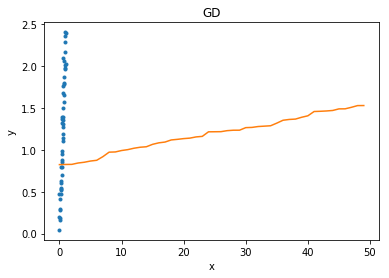

In [80]:
plt.plot(samp_x, samp_y, '.')
plt.plot(slope*samp_x+intersect)
plt.xlabel('x')
plt.ylabel('y')
plt.title('GD')

In [76]:
slope, intersect, costs = SGD_regression(samp_x, samp_y)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'SGD')

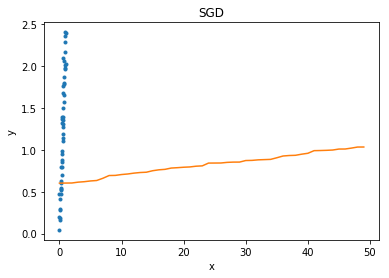

In [78]:
plt.plot(samp_x, samp_y, '.')
plt.plot(slope*samp_x+intersect)
plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD')